In [1]:
from pandas import Series
from pandas import DataFrame
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("EuCitiesTemperatures.csv") 
#EuCitiesTemperatures.csv

In [3]:
countryLat={}
countryLong={}
for ind in df.index:
    countryName = df['country'][ind]
    latitudeVal = df['latitude'][ind]
    longitudeVal = df['longitude'][ind]
    
    #latitudedict
    if countryName in countryLat.keys():
        countryLat[countryName].append(latitudeVal)
    else:
        countryLat[countryName] = [latitudeVal]
        
        
    #longitudedict
    if countryName in countryLong.keys():
        countryLong[countryName].append(longitudeVal)
    else:
        countryLong[countryName] = [longitudeVal]
        
# print("Latitude Dict")
# print(countryLat,end ='\n\n')
# print("Longitude Dict")
# print(countryLong,end = "\n\n")

latVal = 0;
latCount = 0;
longVal = 0;
longCount = 0;

#find average countrylat then update the same dictionary by removing list of val and putting int average
for key, values in countryLat.items():
    #print(key)
    for value in values:
        if(str(value) != 'nan'):
            latVal += float(value)
            latCount+=1
        else:
            continue
        
    
    latAverage = float("{:.2f}".format(latVal/latCount))
    countryLat[key] = latAverage

    latVal = 0
    latCount = 0

#find average countrylong then update the same dictionary by removing list of val and putting int average
for key, values in countryLong.items():
    #print(key)
    for value in values:
        if(str(value) != 'nan'):
            longVal += float(value)
            longCount+=1
        else:
            continue
        
    
    longAverage = float("{:.2f}".format(longVal/longCount))
    countryLong[key] = longAverage

    longVal = 0
    longCount = 0

# print("Updated Longitude Dict with average")
# print(countryLong) 
# print("Updated Latitude Dict with average")
# print(countryLat,end ='\n\n')  

# Preprocessing/Analysis 1.1

In [4]:
#print("longitude average: \n")
longSeries = df.groupby('country')['longitude'].sum(numeric_only=True) / df.groupby('country')['longitude'].count()
longdf = DataFrame(longSeries)
longdf = longdf.round(2)
#longdf


In [5]:
#print("latitude average: \n")
latSeries = df.groupby('country')['latitude'].sum(numeric_only=True) / df.groupby('country')['latitude'].count()
latdf = pd.DataFrame(latSeries)
latdf = latdf.round(2)
#latdf

In [6]:
#dataframe before putting average of lat/long
df

,city,country,population,EU,coastline,latitude,longitude,temperature
0,Elbasan,Albania,2.90,no,yes,41.12,20.08,15.18
1,Andorra,Andorra,0.07,no,no,42.50,1.52,NaN
2,Innsbruck,Austria,8.57,yes,no,NaN,11.41,4.54
3,Graz,Austria,8.57,yes,no,47.08,NaN,6.91
4,Linz,Austria,8.57,yes,no,48.32,14.29,6.79
...,...,...,...,...,...,...,...,...
208,Edinburgh,United Kingdom,65.11,yes,yes,55.95,NaN,NaN
209,Exeter,United Kingdom,65.11,yes,yes,50.70,-3.53,10.14
210,Inverness,United Kingdom,65.11,yes,yes,NaN,-4.23,8.00
211,Glasgow,United Kingdom,65.11,yes,yes,55.87,-4.25,8.60


In [7]:
#IF YOU RUN MORE THAN ONCE, ALL THE NAN VALUES ARE ADJUSTED SO YOU MUST RESTART
#change all nan latitude values based on the previous data frames
#print(df,end = "\n\n")
for ind in df.index:
    countryName = df['country'][ind]
    latitudeVal = df['latitude'][ind]
    if(str(latitudeVal) == "nan" and (latdf.index == str(countryName)).any()):
        latAverageVal = latdf.loc[str(countryName)][0]
        df.at[ind, 'latitude'] = latAverageVal
        
#change all nan longitude values based on the previous data frames
#print(df,end = "\n\n")
for ind in df.index:
    countryName = df['country'][ind]
    longitudeVal = df['longitude'][ind]
    if(str(longitudeVal) == "nan" and (longdf.index == str(countryName)).any()):
        longAverageVal = longdf.loc[str(countryName)][0]
        df.at[ind, 'longitude'] = longAverageVal
        

In [8]:
#dataframe after putting average of lat/long
df = df.round(2)
df

,city,country,population,EU,coastline,latitude,longitude,temperature
0,Elbasan,Albania,2.90,no,yes,41.12,20.08,15.18
1,Andorra,Andorra,0.07,no,no,42.50,1.52,NaN
2,Innsbruck,Austria,8.57,yes,no,47.85,11.41,4.54
3,Graz,Austria,8.57,yes,no,47.08,14.02,6.91
4,Linz,Austria,8.57,yes,no,48.32,14.29,6.79
...,...,...,...,...,...,...,...,...
208,Edinburgh,United Kingdom,65.11,yes,yes,55.95,-2.94,NaN
209,Exeter,United Kingdom,65.11,yes,yes,50.70,-3.53,10.14
210,Inverness,United Kingdom,65.11,yes,yes,53.55,-4.23,8.00
211,Glasgow,United Kingdom,65.11,yes,yes,55.87,-4.25,8.60


# Preprocessing/Analysis 1.2

In [9]:
subsetdf = df[(df['latitude'] >= 40) & (df['latitude'] <= 60) & (df['longitude'] >= 15) * (df['longitude'] <= 30)]
#subsetdf

In [10]:
dummy0 = subsetdf.groupby("country")
dummy = dummy0.count()
countdf = dummy.reset_index()
maxVal = countdf['city'].max()
#countdf

In [11]:
for ind in countdf.index:
    countdfCountry = countdf['country'][ind]
    cityCountValue = countdf['city'][ind].astype(int)
    if cityCountValue == maxVal:
        print(str(countdfCountry) + " has the maximal number cities of count: " + str(maxVal))

Poland has the maximal number cities of count: 9
Romania has the maximal number cities of count: 9


# Preprocessing/Analysis 1.3


In [12]:
#dataframe without temperature average of eu/coastline inputted
df = df.round(2)
#df

In [13]:
euYescoastYes = df[(df['EU'] == 'yes') & (df['coastline'] == 'yes')]
euYescoastYesvalue = euYescoastYes['temperature'].mean()
#print("average of yesyes is: " + str(euYescoastYesvalue))
for ind in df.index:
    temperature = df['temperature'][ind]
    euMember =  df['EU'][ind]
    hasCoast = df['coastline'][ind]
    if(str(temperature) == "nan" and str(euMember) == "yes" and str(hasCoast) == "yes"):
        df.at[ind, 'temperature'] = euYescoastYesvalue
df = df.round(2)
#df

In [14]:
euYescoastNo = df[(df['EU'] == 'yes') & (df['coastline'] == 'no')]
euYescoastNovalue = euYescoastNo['temperature'].mean()
#print("average of yesno is: " + str(euYescoastNovalue))
for ind in df.index:
    temperature = df['temperature'][ind]
    euMember =  df['EU'][ind]
    hasCoast = df['coastline'][ind]
    if(str(temperature) == "nan" and str(euMember) == "yes" and str(hasCoast) == "no"):
        df.at[ind, 'temperature'] = euYescoastNovalue
df = df.round(2)
#df

In [15]:
euNocoastYes = df[(df['EU'] == 'no') & (df['coastline'] == 'yes')]
euNocoastYesvalue = euNocoastYes['temperature'].mean()
#print("average of noyes is: " + str(euNocoastYesvalue))
for ind in df.index:
    temperature = df['temperature'][ind]
    euMember =  df['EU'][ind]
    hasCoast = df['coastline'][ind]
    if(str(temperature) == "nan" and str(euMember) == "no" and str(hasCoast) == "yes"):
        df.at[ind, 'temperature'] = euNocoastYesvalue
df = df.round(2)
#df

In [16]:
euNocoastNo = df[(df['EU'] == 'no') & (df['coastline'] == 'no')]
euNocoastNovalue = euNocoastNo['temperature'].mean()
#print("average of noyes is: " + str(euNocoastNovalue))
for ind in df.index:
    temperature = df['temperature'][ind]
    euMember =  df['EU'][ind]
    hasCoast = df['coastline'][ind]
    if(str(temperature) == "nan" and str(euMember) == "no" and str(hasCoast) == "no"):
        df.at[ind, 'temperature'] = euNocoastNovalue
df = df.round(2)
df

,city,country,population,EU,coastline,latitude,longitude,temperature
0,Elbasan,Albania,2.90,no,yes,41.12,20.08,15.18
1,Andorra,Andorra,0.07,no,no,42.50,1.52,7.48
2,Innsbruck,Austria,8.57,yes,no,47.85,11.41,4.54
3,Graz,Austria,8.57,yes,no,47.08,14.02,6.91
4,Linz,Austria,8.57,yes,no,48.32,14.29,6.79
...,...,...,...,...,...,...,...,...
208,Edinburgh,United Kingdom,65.11,yes,yes,55.95,-2.94,10.31
209,Exeter,United Kingdom,65.11,yes,yes,50.70,-3.53,10.14
210,Inverness,United Kingdom,65.11,yes,yes,53.55,-4.23,8.00
211,Glasgow,United Kingdom,65.11,yes,yes,55.87,-4.25,8.60


# Visualization 1.1

In [17]:
from  matplotlib import pyplot as plt

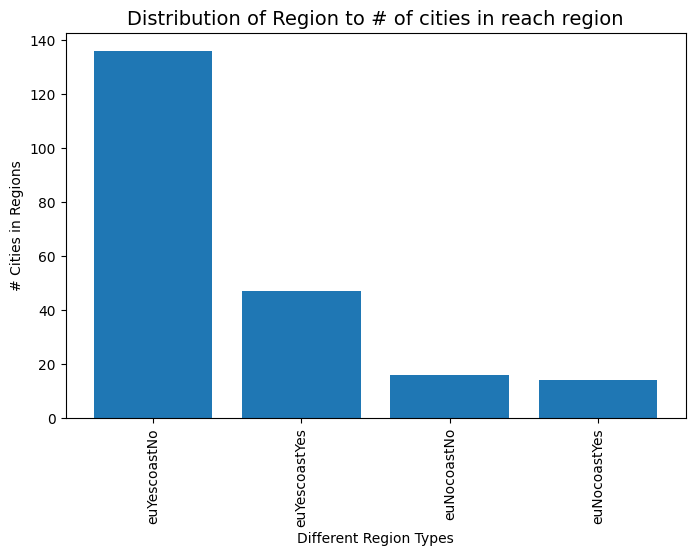

In [18]:
#eu yes coast line yes
regionTypes = ['euYescoastNo','euYescoastYes','euNocoastNo','euNocoastYes']
count1 = euYescoastYes.shape[0]
count2 = euNocoastYes.shape[0]
count3 = euNocoastNo.shape[0]
count4 = euYescoastNo.shape[0]
numInRegion = [count1,count2,count3,count4]

plt.figure(figsize=(8,5))
plt.bar(regionTypes, numInRegion)
plt.xticks(rotation=90)
plt.xlabel('Different Region Types')
plt.ylabel('# Cities in Regions')
plt.title('Distribution of Region to # of cities in reach region',fontsize='14')
plt.show()

# Visualization 1.2

In [19]:
# plt.figure(figsize=(6,6))
# plt.xlabel('Longitude',fontsize=12)
# plt.ylabel('Latitude',fontsize=12)
df1 = df[['city','country','longitude','latitude']]
#df1

In [20]:
import random
import math
import matplotlib.cm as cm

longMax = df1['longitude'].max().astype(int)
latMax = df1['latitude'].max().astype(int)
numOfRows = df1['latitude'].count().astype(int)

latMax = latMax.item()
longMax = longMax.item()
numOfRows = numOfRows.item()

longitudeList = []
latitudeList = []
cityList = []
countryList = []
colorDict={}
#create a dict of random color for each country
for ind in df1.index:
    countryName = df1['country'][ind]
    cityName = df1['city'][ind]
    longVal = df1['longitude'][ind]
    latVal = df1['latitude'][ind]
    
    longitudeList.append(longVal)
    latitudeList.append(latVal)
    cityList.append(cityName)
    countryList.append(countryName)
    
    if countryName in colorDict.keys():
        continue
    else:
        color = "%06x" % random.randint(0, 0xFFFFFF)
        colorDict[countryName] = color

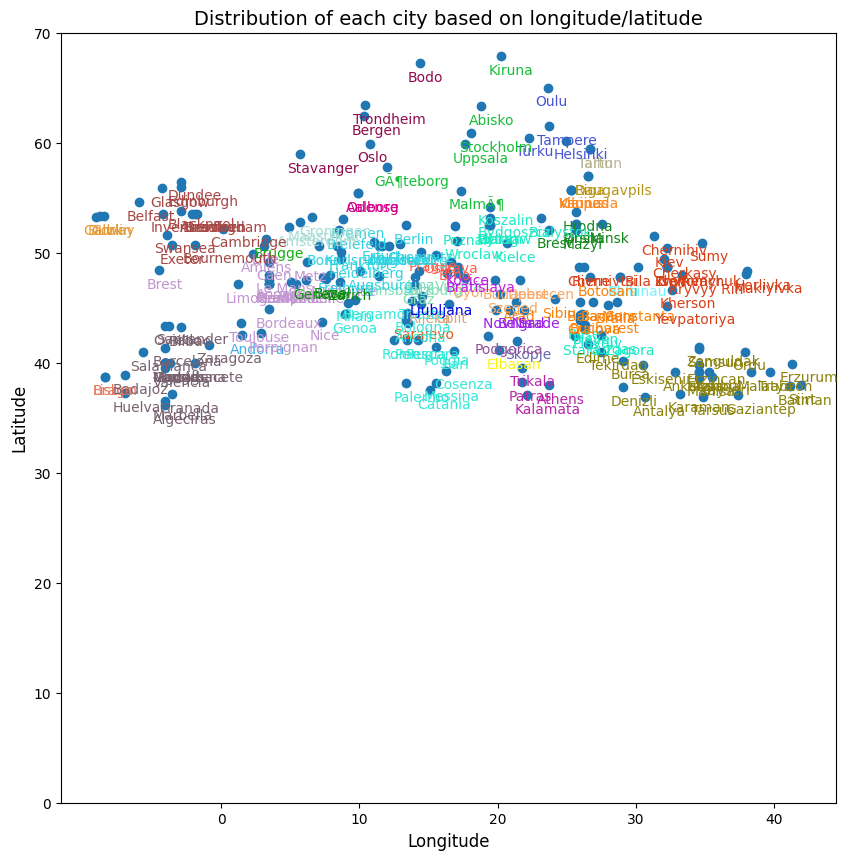

In [21]:
plt.figure(figsize=(10,10))
plt.scatter(longitudeList, latitudeList)

latMaxRound = round(latMax, -1)
longMaxRound =round(longMax, -1)
#plt.scatter(longitudeList,latitudeList, c = None)
plt.yticks(range(0,latMaxRound+1,10))
plt.xticks(range(0,longMaxRound+1,10))
plt.xlabel('Longitude',fontsize=12)
plt.ylabel('Latitude',fontsize=12)
plt.title('Distribution of each city based on longitude/latitude',fontsize='14')


for long,lat,city,country in zip(longitudeList,latitudeList,cityList,countryList):
    #print(str("#" + colorDict.get(country)))
    #each annotation calls the color dict to make sure that cities with the same country have the same color
     plt.annotate(city, xy=(long,lat), 
                 xytext=(-9,-13),textcoords='offset points',color=str("#" + colorDict.get(country)))
plt.show()

# Visualization 1.3

In [22]:
popdf = df[['city','country','population']]
popValList = []
for ind in popdf.index:
    popVal = popdf['population'][ind]
    popValList.append(float(popVal))
popdf = popdf.groupby('population')
popdf = popdf.count()
popdf  = popdf.reset_index()
# popdf

In [23]:
maxPop = popdf['population'].max().astype(float)
maxPop+=1
maxPop = int(maxPop)
if maxPop % 5 == 0:
    upper = maxPop
else:
    upper = (maxPop - maxPop % 5 + 5)
# maxPop, upper

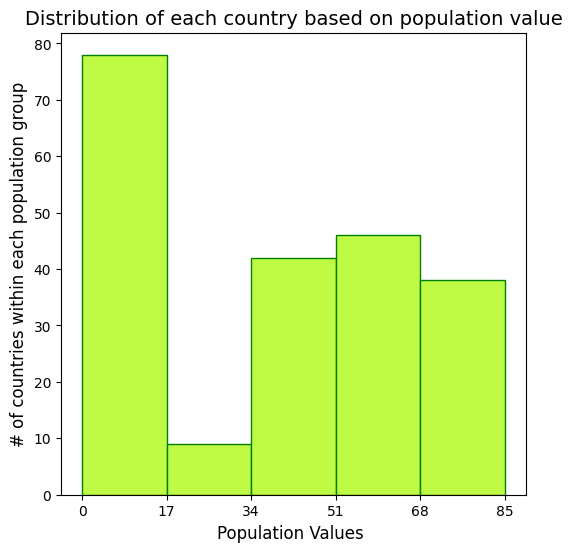

In [24]:
plt.figure(figsize=(6, 6))
plt.hist(popValList,bins=range(0,upper+1,int((upper+1)/5)),color='#bffa45',edgecolor='green')
plt.xticks(range(0,upper+1,int((upper+1)/5)))
plt.xlabel('Population Values ',fontsize=12)
plt.ylabel('# of countries within each population group',fontsize=12)
plt.title('Distribution of each country based on population value',fontsize='14')
plt.show()

# Visualization 1.4

## region 1 = EU = yes, coastline = yes
## region 2 = EU = yes, coastline = No
## region 3 = Eu = no, coastline = yes
## region 4 = EU = No, coastline = No

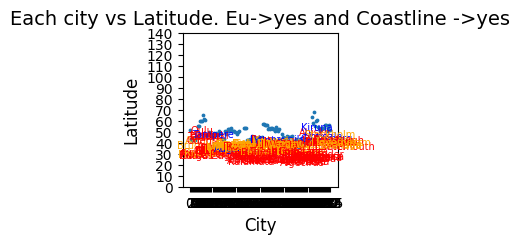

In [25]:
#region 1
euYescoastYes = df[(df['EU'] == 'yes') & (df['coastline'] == 'yes')]
euYescoastYes = euYescoastYes[['city','latitude','temperature']]
cityNameList = []
latitudeList = []
temperatureList = []
for ind in euYescoastYes.index:
    cityName = euYescoastYes['city'][ind]
    latitude = euYescoastYes['latitude'][ind].astype(float)
    latitude = latitude.item()
    temp = euYescoastYes['temperature'][ind].astype(float)
    temp = temp.item()
    
    cityNameList.append(str(cityName))
    latitudeList.append(latitude)
    temperatureList.append(temp)
    
maxNumCity = len(cityNameList)
xAxis = list(range(0,maxNumCity))
maxlat = euYescoastYes['latitude'].max().astype(float)
maxlat = int(maxlat)
if maxlat % maxNumCity == 0:
    upper = maxlat
else:
    upper = (maxlat - maxlat % maxNumCity + maxNumCity)
plt.figure(figsize=(2,2))
plt.scatter(xAxis, latitudeList,s=3)
plt.xlabel('City',fontsize=12)
plt.ylabel('Latitude',fontsize=12)
plt.title('Each city vs Latitude. Eu->yes and Coastline ->yes',fontsize='14')
plt.yticks(range(0,upper+10,10))
plt.xticks(range(0,maxNumCity,1))


for city,lat,temp,x in zip(cityNameList,latitudeList,temperatureList,xAxis):
    if temp > 10:
        colorType = 'FF0000'
    elif temp < 6:
        colorType = '0000FF'
    else: 
        colorType = 'FFA500'
    plt.annotate(city, xy=(x,lat), 
                 xytext=(-9,-13),textcoords='offset points',color=str("#"+colorType),fontsize=7)
plt.show()


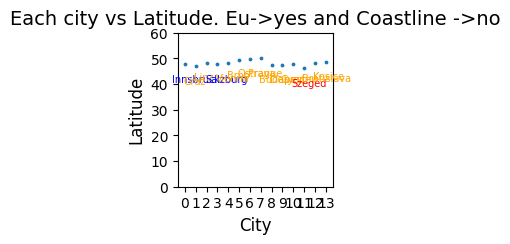

In [26]:
#region 2
euYescoastNo = df[(df['EU'] == 'yes') & (df['coastline'] == 'no')]
#print(euYescoastNo)
euYescoastNo = euYescoastNo[['city','latitude','temperature']]
cityNameList = []
latitudeList = []
temperatureList = []
for ind in euYescoastNo.index:
    cityName = euYescoastNo['city'][ind]
    latitude = euYescoastNo['latitude'][ind].astype(float)
    latitude = latitude.item()
    temp = euYescoastNo['temperature'][ind].astype(float)
    temp = temp.item()
    
    cityNameList.append(str(cityName))
    latitudeList.append(latitude)
    temperatureList.append(temp)
    
maxNumCity = len(cityNameList)
xAxis = list(range(0,maxNumCity))
maxlat = euYescoastNo['latitude'].max().astype(float)
maxlat = int(maxlat)
if maxlat % maxNumCity == 0:
    upper = maxlat
else:
    upper = (maxlat - maxlat % maxNumCity + maxNumCity)
plt.figure(figsize=(2,2))
plt.scatter(xAxis, latitudeList,s=3)
plt.xlabel('City',fontsize=12)
plt.ylabel('Latitude',fontsize=12)
plt.title('Each city vs Latitude. Eu->yes and Coastline ->no',fontsize='14')
plt.yticks(range(0,upper+10,10))
plt.xticks(range(0,maxNumCity,1))


for city,lat,temp,x in zip(cityNameList,latitudeList,temperatureList,xAxis):
    if temp > 10:
        colorType = 'FF0000'
    elif temp < 6:
        colorType = '0000FF'
    else: 
        colorType = 'FFA500'
    plt.annotate(city, xy=(x,lat), 
                 xytext=(-9,-13),textcoords='offset points',color=str("#"+colorType),fontsize=7)
plt.show()

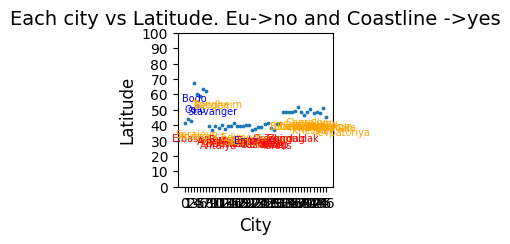

In [27]:
#region 3
euNocoastyes = df[(df['EU'] == 'no') & (df['coastline'] == 'yes')]
#print(euNocoastyes)
euNocoastyes = euNocoastyes[['city','latitude','temperature']]
cityNameList = []
latitudeList = []
temperatureList = []
for ind in euNocoastyes.index:
    cityName = euNocoastyes['city'][ind]
    latitude = euNocoastyes['latitude'][ind].astype(float)
    latitude = latitude.item()
    temp = euNocoastyes['temperature'][ind].astype(float)
    temp = temp.item()
    
    cityNameList.append(str(cityName))
    latitudeList.append(latitude)
    temperatureList.append(temp)
    
maxNumCity = len(cityNameList)
xAxis = list(range(0,maxNumCity))
maxlat = euNocoastyes['latitude'].max().astype(float)
maxlat = int(maxlat)
if maxlat % maxNumCity == 0:
    upper = maxlat
else:
    upper = (maxlat - maxlat % maxNumCity + maxNumCity)
plt.figure(figsize=(2,2))
plt.scatter(xAxis, latitudeList,s=3)
plt.xlabel('City',fontsize=12)
plt.ylabel('Latitude',fontsize=12)
plt.title('Each city vs Latitude. Eu->no and Coastline ->yes',fontsize='14')
plt.yticks(range(0,upper+10,10))
plt.xticks(range(0,maxNumCity,1))


for city,lat,temp,x in zip(cityNameList,latitudeList,temperatureList,xAxis):
    if temp > 10:
        colorType = 'FF0000'
    elif temp < 6:
        colorType = '0000FF'
    else: 
        colorType = 'FFA500'
    plt.annotate(city, xy=(x,lat), 
                 xytext=(-9,-13),textcoords='offset points',color=str("#"+colorType),fontsize=7)
plt.show()

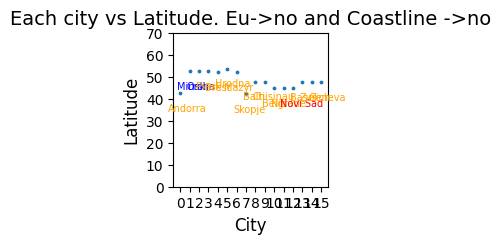

In [28]:
#region 4
euNocoastNo = df[(df['EU'] == 'no') & (df['coastline'] == 'no')]
#print(euNocoastNo)
euNocoastNo = euNocoastNo[['city','latitude','temperature']]
cityNameList = []
latitudeList = []
temperatureList = []
for ind in euNocoastNo.index:
    cityName = euNocoastNo['city'][ind]
    latitude = euNocoastNo['latitude'][ind].astype(float)
    latitude = latitude.item()
    temp = euNocoastNo['temperature'][ind].astype(float)
    temp = temp.item()
    
    cityNameList.append(str(cityName))
    latitudeList.append(latitude)
    temperatureList.append(temp)
    
maxNumCity = len(cityNameList)
xAxis = list(range(0,maxNumCity))
maxlat = euNocoastNo['latitude'].max().astype(float)
maxlat = int(maxlat)
if maxlat % maxNumCity == 0:
    upper = maxlat
else:
    upper = (maxlat - maxlat % maxNumCity + maxNumCity)
plt.figure(figsize=(2,2))
plt.scatter(xAxis, latitudeList,s=3)
plt.xlabel('City',fontsize=12)
plt.ylabel('Latitude',fontsize=12)
plt.title('Each city vs Latitude. Eu->no and Coastline ->no',fontsize='14')
plt.yticks(range(0,upper+10,10))
plt.xticks(range(0,maxNumCity,1))


for city,lat,temp,x in zip(cityNameList,latitudeList,temperatureList,xAxis):
    if temp > 10:
        colorType = 'FF0000'
    elif temp < 6:
        colorType = '0000FF'
    else: 
        colorType = 'FFA500'
    plt.annotate(city, xy=(x,lat), 
                 xytext=(-9,-13),textcoords='offset points',color=str("#"+colorType),fontsize=7)
plt.show()

# 